In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import importlib
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from scipy.stats import norm

In [0]:
for dirname, _, filenames in os.walk(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest.txt
C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest2.txt
C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatraining.txt


In [0]:
#df= pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatraining.txt')
df_training = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatraining.txt',  header=0, parse_dates=True, squeeze=True)

In [0]:
df_training.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [0]:
df_training.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [0]:
df_training.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [0]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [0]:
df_training.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [0]:
df_training.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

**TEMPERATURE**

In [0]:
# grid of histograms
fig = plt.figure(figsize=(13, 13)) 
fig_dims = (3, 2)

# Temperature df
plt.subplot2grid(fig_dims, (0, 0))
df['Temperature'].hist(bins = 6)
plt.title('Temperature df')

# Temperature test
plt.subplot2grid(fig_dims, (0, 1))
df_test_1['Temperature'].hist(bins=6)
plt.title('Temperature test 1')

# Temperature test2
plt.subplot2grid(fig_dims, (1, 0))
df_test_2['Temperature'].hist(bins=6)
plt.title('Temperature test 2')

# Temperature training
plt.subplot2grid(fig_dims, (1, 1))
df_training['Temperature'].hist(bins=6)
plt.title('Temperature training')

plt.show()

Text(0.5, 1.0, 'Temperature')

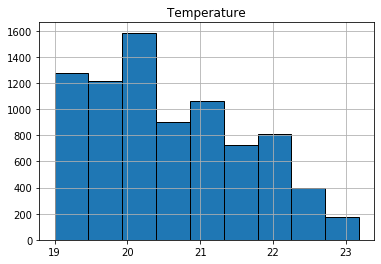

In [0]:
df_training['Temperature'].hist(bins=9, edgecolor='black')
plt.title('Temperature')
plt.show()

In [0]:
Temperature = df_training['Temperature'].copy()
Temperature.describe()

count    8143.000000
mean       20.619084
std         1.016916
min        19.000000
25%        19.700000
50%        20.390000
75%        21.390000
max        23.180000
Name: Temperature, dtype: float64

In [0]:
x_default = pd.crosstab(df_training['Temperature']//0.5*0.5, df_training['Occupancy'])
x_default

Occupancy,0,1
Temperature,,
19.0,1280,0
19.5,1212,23
20.0,1564,56
20.5,951,180
21.0,679,303
21.5,275,462
22.0,207,598
22.5,173,91
23.0,73,16


Text(0.5, 0, 'Temperature')

Text(0, 0.5, 'Occupancy')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

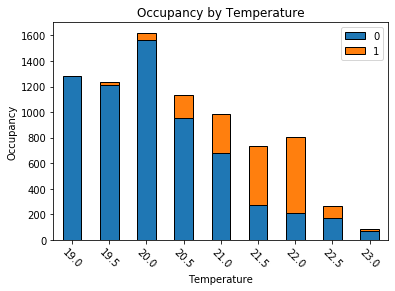

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by Temperature', edgecolor='black')
pclass_xt = pd.crosstab(df_training['Temperature'], df_training['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('Temperature')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

**HUMIDITY**

In [0]:
# grid of histograms
fig = plt.figure(figsize=(13, 13)) 
fig_dims = (3, 2)

# Temperature df
plt.subplot2grid(fig_dims, (0, 0))
df['Humidity'].hist(bins=6)
plt.title('Humidity df')

# Temperature test
plt.subplot2grid(fig_dims, (0, 1))
df_test_1['Humidity'].hist(bins=6)
plt.title('Humidity test 1')

# Temperature test2
plt.subplot2grid(fig_dims, (1, 0))
df_test_2['Humidity'].hist(bins=6)
plt.title('Humidity test 2')

# Temperature training
plt.subplot2grid(fig_dims, (1, 1))
df_training['Humidity'].hist(bins=6)
plt.title('Humidity training')

plt.show()

Text(0.5, 1.0, 'Humidity')

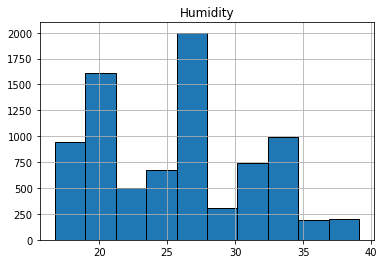

In [0]:
df_training['Humidity'].hist(bins=10, edgecolor='black')
plt.title('Humidity')
plt.show()

In [0]:
Humidity = df_training['Humidity'].copy()
Humidity.describe()

count    8143.000000
mean       25.731507
std         5.531211
min        16.745000
25%        20.200000
50%        26.222500
75%        30.533333
max        39.117500
Name: Humidity, dtype: float64

In [0]:
x_default = pd.crosstab(df_training['Humidity']//2.5*2.5, df_training['Occupancy'])
x_default

Occupancy,0,1
Humidity,,
15.0,127,0
17.5,1667,143
20.0,486,444
22.5,444,131
25.0,1579,364
27.5,501,92
30.0,712,84
32.5,770,237
35.0,120,84


Text(0.5, 0, 'Humidity')

Text(0, 0.5, 'Occupancy')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

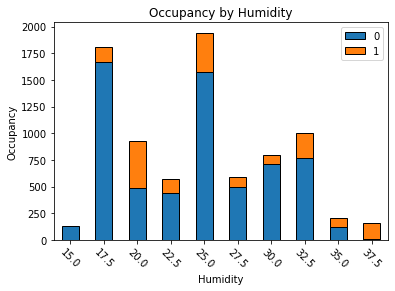

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by Humidity', edgecolor='black')
pclass_xt = pd.crosstab(df_training['Humidity'], df_training['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('Humidity')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

In [0]:
x_default_norm = x_default.div(x_default.sum(1).astype(float), axis=0)
x_default_norm

Occupancy,0,1
Humidity,,
15.0,1.000000,0.000000
17.5,0.920994,0.079006
20.0,0.522581,0.477419
22.5,0.772174,0.227826
25.0,0.812661,0.187339
27.5,0.844857,0.155143
30.0,0.894472,0.105528
32.5,0.764647,0.235353
35.0,0.588235,0.411765


Text(0.5, 0, 'Humidity')

Text(0, 0.5, 'Occupancy')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

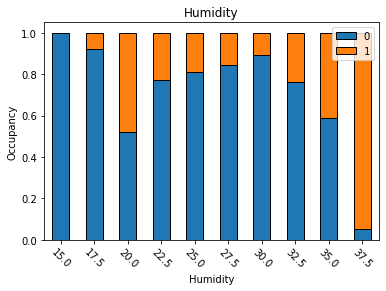

In [0]:
x_default_norm.plot(kind='bar', stacked=True, title='Humidity', edgecolor='black')
plt.xlabel('Humidity')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

In [0]:
**LIGHT**

In [0]:
# grid of histograms
fig = plt.figure(figsize=(13, 13)) 
fig_dims = (3, 2)

# Temperature df
plt.subplot2grid(fig_dims, (0, 0))
df['Light'].hist(bins=6)
plt.title('Light df')

# Temperature test
plt.subplot2grid(fig_dims, (0, 1))
df_test_1['Light'].hist(bins=6)
plt.title('Light test 1')

# Temperature test2
plt.subplot2grid(fig_dims, (1, 0))
df_test_2['Light'].hist(bins=6)
plt.title('Light test 2')

# Temperature training
plt.subplot2grid(fig_dims, (1, 1))
df_training['Light'].hist(bins=6)
plt.title('Light training')

plt.show()

Text(0.5, 1.0, 'Light')

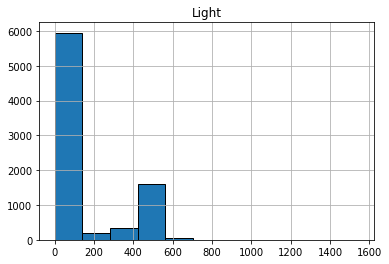

In [0]:
df_training['Light'].hist(bins=11, edgecolor='black')
plt.title('Light')
plt.show()

In [0]:
Light = df_training['Light'].copy()
Light.describe()

count    8143.000000
mean      119.519375
std       194.755805
min         0.000000
25%         0.000000
50%         0.000000
75%       256.375000
max      1546.333333
Name: Light, dtype: float64

In [0]:
x_default = pd.crosstab(df_training['Light']//100*100, df_training['Occupancy'])
x_default

Occupancy,0,1
Light,,
0.0,5873,1
100.0,175,0
200.0,136,4
300.0,143,30
400.0,49,1481
500.0,30,197
600.0,5,13
700.0,0,3
800.0,1,0


Text(0.5, 0, 'Light')

Text(0, 0.5, 'Occupancy')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

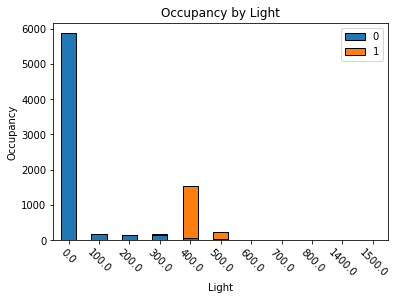

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by Light', edgecolor='black')
pclass_xt = pd.crosstab(df_training['Light'], df_training['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('Light')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

In [0]:
**CO2**

In [0]:
# grid of histograms
fig = plt.figure(figsize=(13, 13)) 
fig_dims = (3, 2)

# CO2 df
plt.subplot2grid(fig_dims, (0, 0))
df['CO2'].hist(bins=6)
plt.title('CO2 df')

# CO2 test
plt.subplot2grid(fig_dims, (0, 1))
df_test_1['CO2'].hist(bins=6)
plt.title('CO2 test 1')

# CO2 test2
plt.subplot2grid(fig_dims, (1, 0))
df_test_2['CO2'].hist(bins=6)
plt.title('CO2 test 2')

# CO2 training
plt.subplot2grid(fig_dims, (1, 1))
df_training['CO2'].hist(bins=6)
plt.title('CO2 training')

plt.show()

Text(0.5, 1.0, 'CO2')

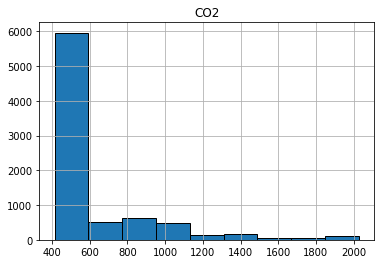

In [0]:
df_training['CO2'].hist(bins=9, edgecolor='black')
plt.title('CO2')
plt.show()

In [0]:
CO2 = df_training['CO2'].copy()
CO2.describe()

count    8143.000000
mean      606.546243
std       314.320877
min       412.750000
25%       439.000000
50%       453.500000
75%       638.833333
max      2028.500000
Name: CO2, dtype: float64

In [0]:
x_default = pd.crosstab(df_training['CO2']//200*200, df_training['Occupancy'])
x_default

Occupancy,0,1
CO2,,
400.0,5860,127
600.0,279,320
800.0,109,472
1000.0,81,414
1200.0,44,124
1400.0,22,87
1600.0,19,39
1800.0,0,104
2000.0,0,42


Text(0.5, 0, 'CO2')

Text(0, 0.5, 'Occupancy')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

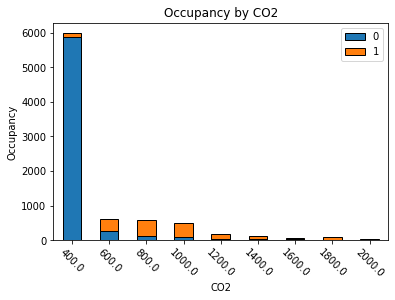

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by CO2', edgecolor='black')
pclass_xt = pd.crosstab(df_training['CO2'], df_training['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('CO2')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

**HUMIDITY RATIO**

In [0]:
# grid of histograms
fig = plt.figure(figsize=(13, 13)) 
fig_dims = (3, 2)

# Temperature df
plt.subplot2grid(fig_dims, (0, 0))
df['HumidityRatio'].hist(bins=6)
plt.title('HumidityRatio df')

# Temperature test
plt.subplot2grid(fig_dims, (0, 1))
df_test_1['HumidityRatio'].hist(bins=6)
plt.title('HumidityRatio test 1')

# Temperature test2
plt.subplot2grid(fig_dims, (1, 0))
df_test_2['HumidityRatio'].hist(bins=6)
plt.title('HumidityRatio test 2')

# Temperature training
plt.subplot2grid(fig_dims, (1, 1))
df_training['HumidityRatio'].hist(bins=6)
plt.title('HumidityRatio training')

plt.show()

Text(0.5, 1.0, 'HumidityRatio')

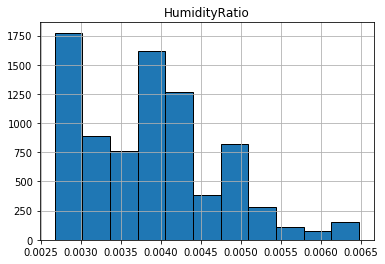

In [0]:
df_training['HumidityRatio'].hist(bins=11, edgecolor='black')
plt.title('HumidityRatio')
plt.show()

In [0]:
HumidityRatio = df_training['HumidityRatio'].copy()
HumidityRatio.describe()

count    8143.000000
mean        0.003863
std         0.000852
min         0.002674
25%         0.003078
50%         0.003801
75%         0.004352
max         0.006476
Name: HumidityRatio, dtype: float64

In [0]:
x_default = pd.crosstab(df_training['HumidityRatio']//0.0004*0.0004, df_training['Occupancy'])
x_default

Occupancy,0,1
HumidityRatio,,
0.0024,991,7
0.0028,1186,143
0.0032,344,452
0.0036,1687,105
0.0040,1168,216
0.0044,142,293
0.0048,752,143
0.0052,86,156
0.0056,42,39


Text(0.5, 0, 'HumidityRatio')

Text(0, 0.5, 'Occupancy')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

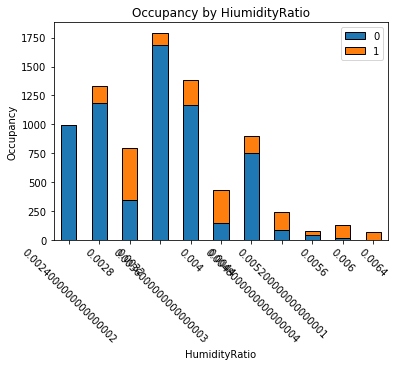

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by HiumidityRatio', edgecolor='black')
pclass_xt = pd.crosstab(df_training['HumidityRatio'], df_training['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('HumidityRatio')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

**OCCUPANCY**

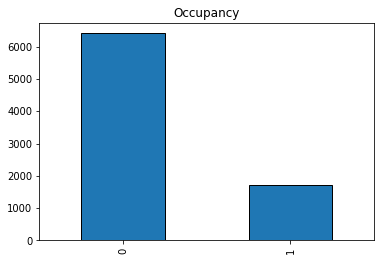

In [0]:
df_training['Occupancy'].value_counts().plot(kind='bar', title='Occupancy', edgecolor='black')
plt.show();

 **Project Task 1 - Basic Classifiers and Evaluation**

1. Prepare the dataset in order to build several basic classifiers able to predict room occupancy from the available variables. You are welcome in creating new variables.


2. Solve the classification task with k-NN (testing values of k), Naive Bayes, Logistic Regression, Decision Tree using cross-validation and/or random/grid search for parameter estimation.


3. Evaluate each classifier using Accuracy, Precision, Recall, F1, ROC, AUC and Lift Chart.


4. Try to reduce the dimensionality of the dataset using the methods studied (or new ones). Test PCA and try to solve the classification task in two dimensions. Plot the dataset in the two new dimensions and observe the decision boundary and the one of the trained algorithms.


5. Analyze the value distribution of the class to predict and turn the dataset into an imbalanced version reaching a strong majority-minority distribution (e.g. 96%-4%). Then solve again the classification task adopting the various techniques studied (or new ones).


6. Select two continuous attributes, define a regression problem and try to solve it using different techniques reporting various evaluation measures. Plot the two-dimensional dataset. Then generalize to multiple linear regression and observe how the performance varies.


7. Draw your conclusions about the basic classifiers and techniques adopted in this analysis.

**COVARIANCE and CORRELATION**

In [0]:
df_training.cov()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.034119,-0.797365,128.721228,178.963364,1.315394e-04,0.223846
Humidity,-0.797365,30.594295,40.749601,763.274029,4.503209e-03,0.300787
Light,128.721228,40.749601,37929.823503,40648.651609,3.824894e-02,72.272067
CO2,178.963364,763.274029,40648.651609,98797.613643,1.678578e-01,91.558968
HumidityRatio,0.000132,0.004503,0.038249,0.167858,7.264686e-07,0.000105
Occupancy,0.223846,0.300787,72.272067,91.558968,1.046746e-04,0.167266


In [0]:
df_corr = df_training.copy()

In [0]:
df_corr.corr(method='pearson')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


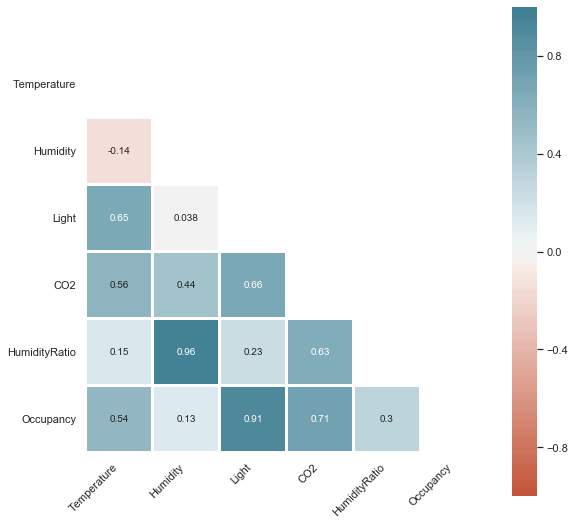

In [0]:
sns.set(style='white')
corr = df_corr.corr(method='pearson')
plt.figure(figsize = (9,9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, 
                      mask=mask,
                      square=True,
                      cmap=sns.diverging_palette(20, 220, n=200), 
                      linewidths=2, 
                      center=0.0, vmax=1.0, vmin=-1.0, 
                      annot=True, annot_kws={"size": 10});
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [0]:
df_corr.corr(method='spearman')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.193389,0.565237,0.636906,0.104765,0.532830
Humidity,-0.193389,1.000000,0.007065,0.223519,0.940327,0.129235
Light,0.565237,0.007065,1.000000,0.473103,0.169057,0.804645
CO2,0.636906,0.223519,0.473103,1.000000,0.378357,0.656651
HumidityRatio,0.104765,0.940327,0.169057,0.378357,1.000000,0.255836
Occupancy,0.532830,0.129235,0.804645,0.656651,0.255836,1.000000


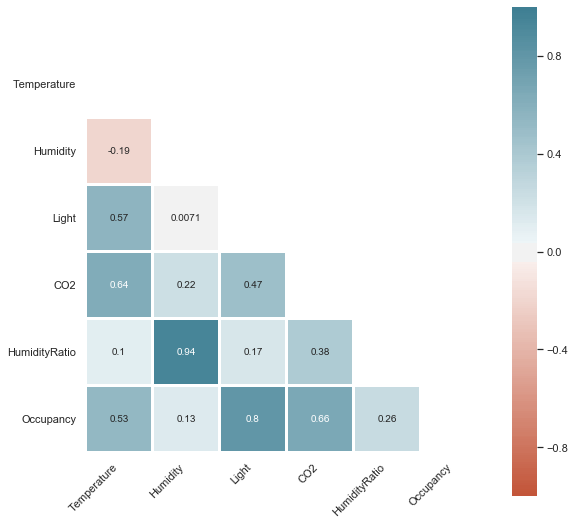

In [0]:
sns.set(style='white')
corr = df_corr.corr(method='spearman')
plt.figure(figsize = (9,9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, 
                      mask=mask,
                      square=True,
                      cmap=sns.diverging_palette(20, 220, n=200), 
                      linewidths=2, 
                      center=0.0, vmax=1.0, vmin=-1.0, 
                      annot=True, annot_kws={"size": 10});
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');